In [1]:
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight') 
%matplotlib inline

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix

!pip install pycaret
from pycaret.regression import *

import plotly.express as px
import plotly.graph_objects as go

In [4]:
#loading the csv file
dataset=pd.read_csv('./input/heart_2020_cleaned.csv')

In [5]:
#value_count
dataset.value_counts()

HeartDisease  BMI    Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  DiffWalking  Sex     AgeCategory  Race      Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer
No            27.44  No       No               No      0.0             0.0           No           Female  65-69        White     No        Yes               Very good  7.0        No      No             No            16
              26.63  No       No               No      0.0             0.0           No           Female  65-69        White     No        Yes               Very good  8.0        No      No             No            15
              24.41  No       No               No      0.0             0.0           No           Male    55-59        White     No        Yes               Excellent  7.0        No      No             No            14
                                                                                                          18-24        White     N

In [6]:
#finding the shape of the dataset rows, cloumns
dataset.shape

(319795, 18)

In [7]:
#displaying the column names 
dataset.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [8]:
#finding the unique values
dataset.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [9]:
#statistics
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [10]:
#cleaning the data
#to check whether null values are present
dataset.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [11]:
#relationship analysis
#correlation analysis
cor = dataset.corr()
cor

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


<AxesSubplot:>

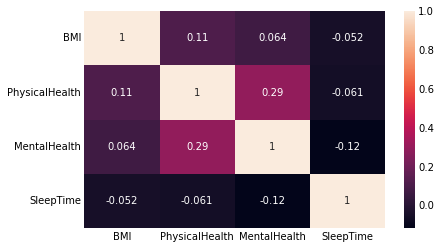

In [12]:
#plotting the correlation in the dataset
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns, annot = True)

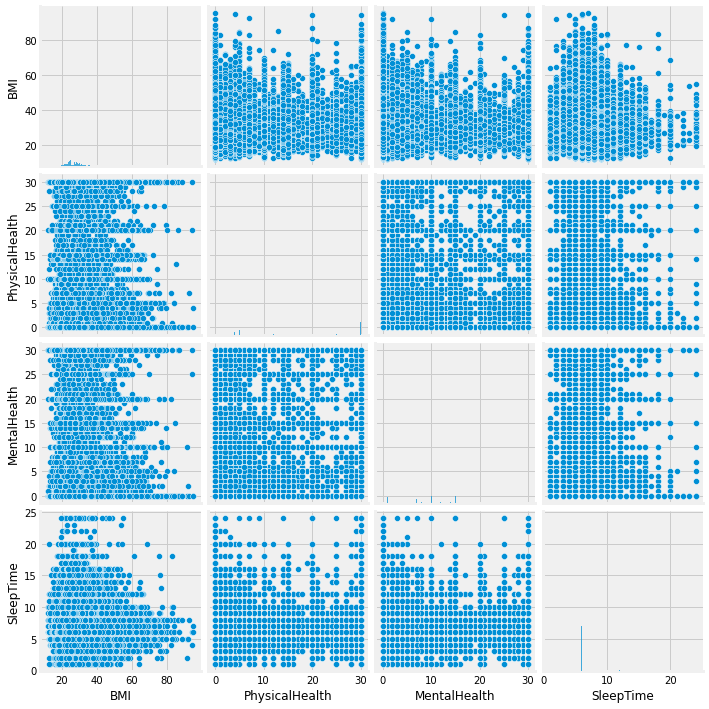

In [13]:
#visualization for seeing the correlation
sns.pairplot(dataset)

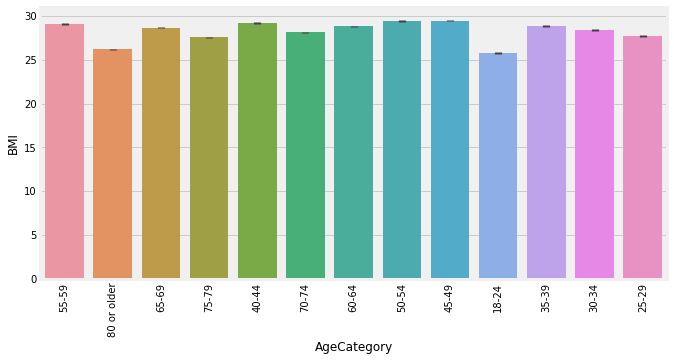

In [14]:
#visulaisation
# Finding the states with the highest total cases
plt.figure(figsize=(10,5))
sns.barplot(x= dataset['AgeCategory'],y= dataset['BMI'])
plt.xticks(rotation=90)
plt.show()

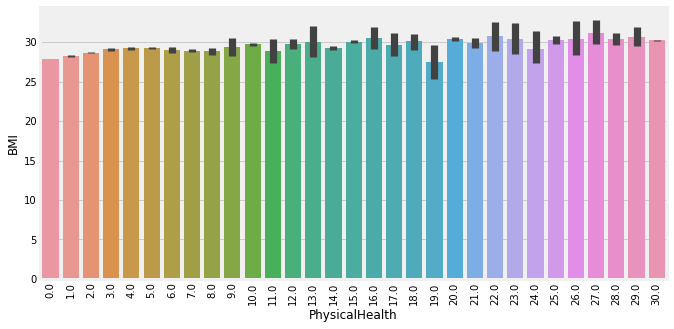

In [15]:
#visulaisation
# Finding the states with the highest total cases
plt.figure(figsize=(10,5))
sns.barplot(x= dataset['PhysicalHealth'],y= dataset['BMI'])
plt.xticks(rotation=90)
plt.show()

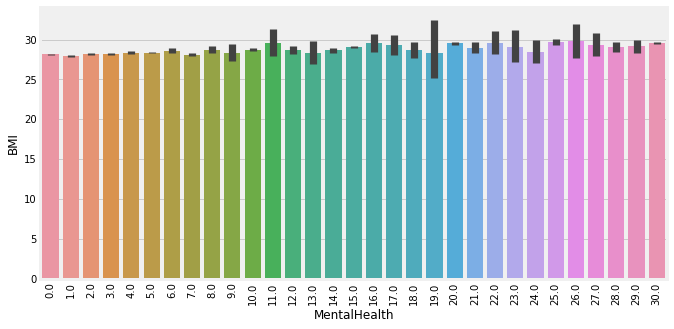

In [16]:
#visulaisation
# Finding the states with the highest total cases
plt.figure(figsize=(10,5))
sns.barplot(x= dataset['MentalHealth'],y= dataset['BMI'])
plt.xticks(rotation=90)
plt.show()

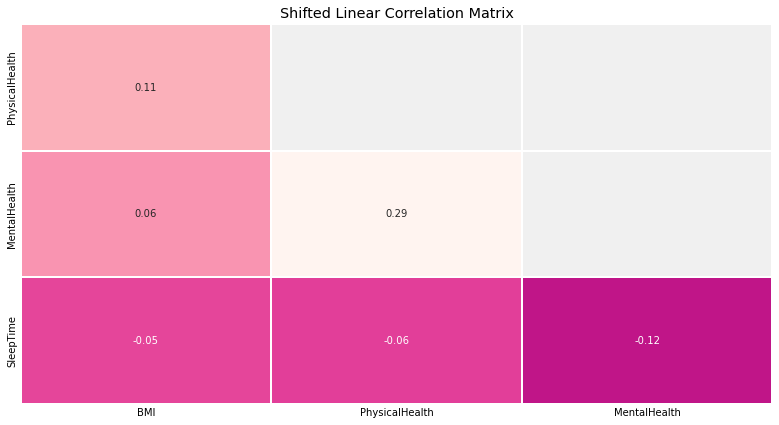

In [17]:
#Correlation function
def corrMat(dataset,id=False):
    
    corr_mat = dataset.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(dataset.drop(['HeartDisease'],axis = 1))

In [ ]:
 # Plotting the Active cases per states
dataset.plot(kind='bar', x='BMI', y='MentalHealth',color="red", figsize=(15,6),
        title="Active cases by states", ylabel="Number of active cases")
print("Active cases per states:")

In [ ]:
#Statistics
dataset.describe().T.style.bar(subset=['mean'], color='#606ff2')\
                            .background_gradient(subset=['std'], cmap='PuBu')\
                            .background_gradient(subset=['50%'], cmap='PuBu')

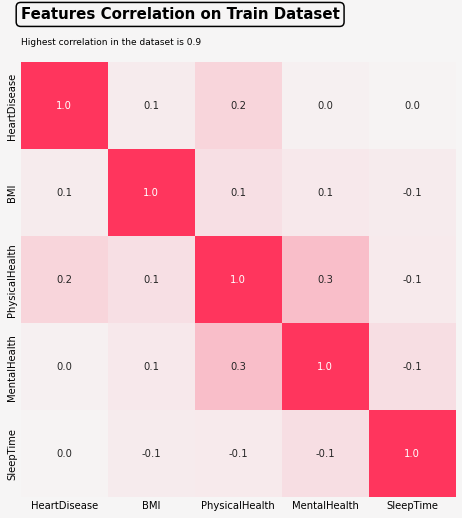

In [12]:
#Correlation 
background_color = "#f6f5f5"

fig = plt.figure(figsize=(18, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

colors = ["#ff355d", "#f6f5f5","#ff355d"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(0, -0.5, 'Features Correlation on Train Dataset', fontsize=15, fontweight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
ax0.text(0, -0.2, 'Highest correlation in the dataset is 0.9', fontsize=9, fontweight='light')

sns.heatmap(dataset.corr(), ax=ax0, vmin=-1, vmax=1, annot=True, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, fmt='.1f')
plt.show()

In [5]:
heart_cat = dataset.select_dtypes(include="object")
dataset["HeartDisease"] = dataset["HeartDisease"].replace({"No": 0, "Yes": 1})

In [6]:
#value_count
heart_cat.value_counts()

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex     AgeCategory  Race   Diabetic                 PhysicalActivity  GenHealth  Asthma  KidneyDisease  SkinCancer
No            No       No               No      No           Female  65-69        White  No                       Yes               Very good  No      No             No            1852
                                                             Male    18-24        White  No                       Yes               Very good  No      No             No            1746
                                                             Female  60-64        White  No                       Yes               Very good  No      No             No            1704
                                                             Male    18-24        White  No                       Yes               Excellent  No      No             No            1661
                                                             Female  55-59        W

In [9]:
dataset_dumm = pd.get_dummies(dataset)

In [10]:
y = dataset_dumm["HeartDisease"]
X = dataset_dumm.drop("HeartDisease", axis=1)
X_scaler = X[["BMI","PhysicalHealth","MentalHealth","SleepTime"]]
scaler = preprocessing.MinMaxScaler().fit(X_scaler)
X_scaled = scaler.transform(X_scaler)
X_scaled = pd.DataFrame(X_scaled, columns = ["BMI","PhysicalHealth","MentalHealth","SleepTime"])
X = X.drop(["BMI","PhysicalHealth","MentalHealth","SleepTime"], axis=1)
X = pd.concat([X, X_scaled], axis = 1)

In [11]:
y.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y)

In [15]:
#Linear Regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
#Regression coefficient
reg.coef_

array([-7.58573426e+08, -7.58573426e+08, -2.11977918e+11, -2.11977918e+11,
        1.40397270e+10,  1.40397270e+10, -9.80984219e+09, -9.80984219e+09,
       -9.41596530e+11, -9.41596530e+11,  1.36090904e+10,  1.36090904e+10,
        1.36090904e+10,  1.36090904e+10,  1.36090904e+10,  1.36090904e+10,
        1.36090904e+10,  1.36090904e+10,  1.36090904e+10,  1.36090904e+10,
        1.36090904e+10,  1.36090904e+10,  1.36090904e+10,  1.18577680e+09,
        1.18577680e+09,  1.18577680e+09,  1.18577680e+09,  1.18577680e+09,
        1.18577680e+09,  3.26715708e+10,  3.26715708e+10,  3.26715708e+10,
        3.26715708e+10,  8.67213904e+09,  8.67213904e+09,  5.34578385e+10,
        5.34578385e+10,  5.34578385e+10,  5.34578385e+10,  5.34578385e+10,
        8.84865057e+08,  8.84865057e+08, -9.31309443e+09, -9.31309443e+09,
        3.56094659e+09,  3.56094659e+09,  1.10919202e-02,  1.19798390e-02,
       -5.36496805e-04, -2.16940555e-02])

In [17]:
#Prediction
pred = reg.predict(X_test)
pred

array([ 0.40539551,  0.10131836, -0.01733398, ...,  0.21252441,
        0.0402832 ,  0.01403809])

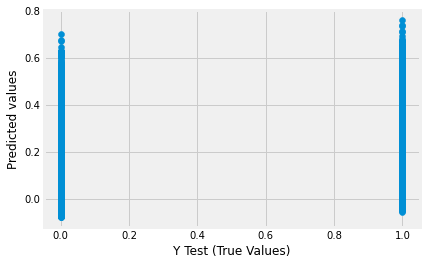

In [18]:
#Plotting
plt.scatter(y_test,pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [20]:
metrics.explained_variance_score(y_test,pred)

0.15065902347672067